In [ ]:
import numpy as np
from scipy.special import lambertw as LW
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

: 

In [22]:
# ランダム化された点の分布を見るための数の定義
Num = 100000

# ノイズを付与した座標の値を格納するためのリストの定義
zx_list = []
# zy_list = []

# 実際の位置の定義
real_x = 5.0
real_y = 3.0

# 実際の時間を定義(今の時間を0と定義してノイズをかける)
real_t = 0.0

# ノイズを付与した時刻の値を格納するためのリストの定義
zt_list = []

# epsilonの定義
epsilon = 20

# 敏感度について定義する(本来は隣接したデータセットの差の最大値)
delta_u = 1

# 正規化係数
C_x = epsilon**2 / (2*np.pi)
A = np.e**( epsilon / (2 * delta_u) )
C_t = A / (np.e - 1)

In [23]:
# 平面ラプラスノイズを座標に付与する
theta = np.random.uniform(0, 2*np.pi, Num)
#theta = 0
#r = np.linspace(0, 0, Num-2)
p_x = np.random.uniform(0, 1, Num)
W = LW( ((p_x - 1) / np.e), k = -1)
r = ( -1 / epsilon ) * ( W + 1)
#p_t = np.linspace(0, 1, Num)
#p_t_ = np.delete(p_t, [0, Num-1])
p_t_ = np.random.uniform(0, 1, Num)
for i in range(Num):
    if p_t_[i] <= (10/11):
        t_ = (20/epsilon) * np.log( (11/10)*p_t_[i] )
    else:
        t_ = (2/epsilon) * np.log( 1/(11*(1-p_t_[i])) )
    z_t = real_t + t_
    #z_t = real_t
    zt_list.append(np.array(z_t))
#t___ = np.linspace(-1, 0, Num)
#t_ = (2/epsilon) * (np.log((np.e**(epsilon/2)-1)*p_t + 1)) - 1
z_x = real_x + r * np.cos(theta)
zx_list.append(np.array(z_x))
zx2_list = []
for j in range(Num):
    zx2_list.append(np.array(zx_list[0][j]))


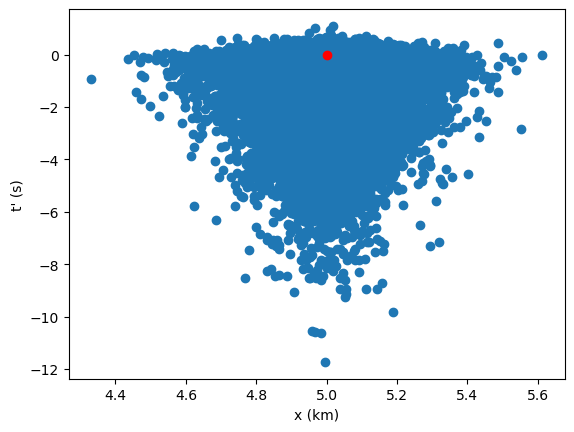

In [24]:
# 散布図としてノイズを付与した座標を出力する
fig, ax = plt.subplots()
plt.scatter(np.real(zx2_list), zt_list)
# 実際の位置を赤く表示
plt.scatter(real_x, real_t, color="red")
ax.set_xlabel("x (km)")
ax.set_ylabel("t' (s)")
plt.savefig("scatter_exp1.jpg", dpi=120)
plt.show()

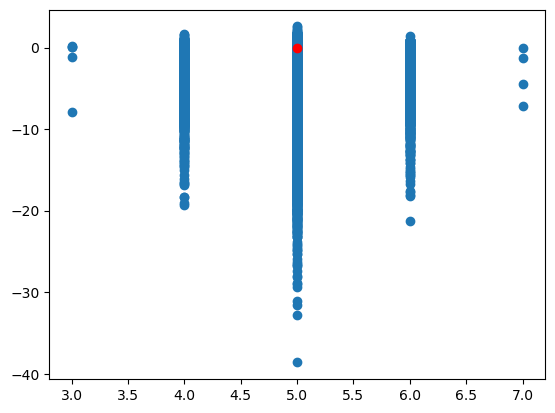

In [21]:
zx_ = np.round(np.real(zx2_list))
zt_ = np.round(zt_list, decimals=2)
plt.scatter(zx_, zt_)
plt.scatter(real_x, real_t, color="red")
ax.set_xlabel("x (km)")
ax.set_ylabel("t' (s)")
plt.savefig("scatter_exp2.jpg", dpi=120)
plt.show()

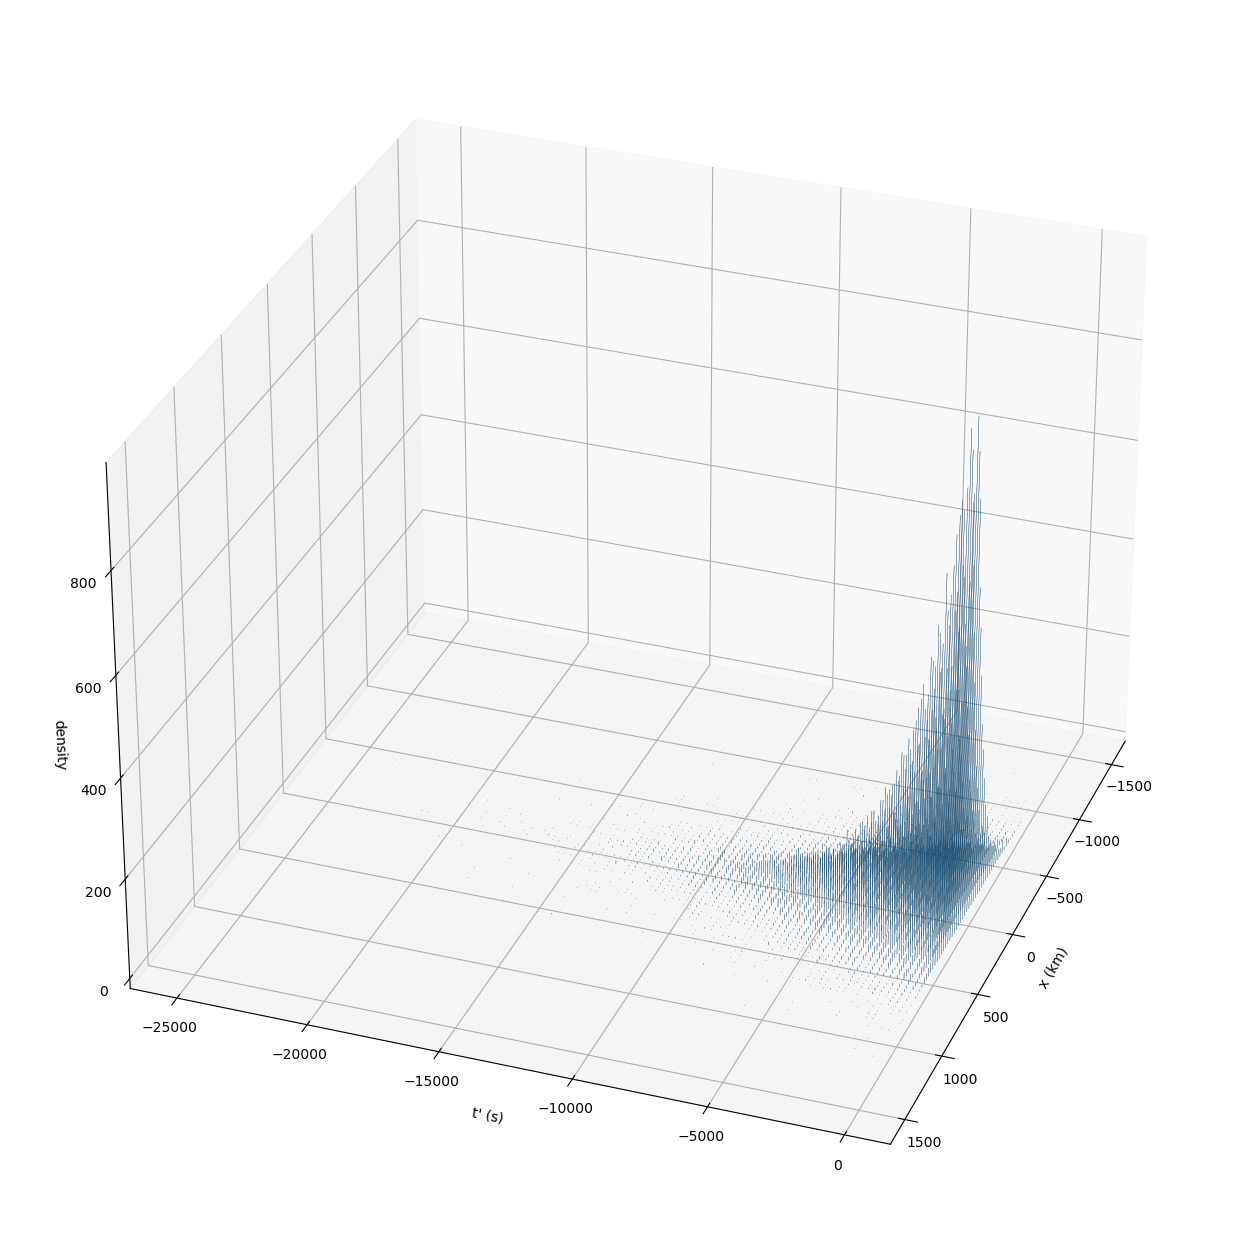

In [17]:
# ヒストグラムを出力する
hist, xedges, yedges = np.histogram2d(zx_, zt_, bins=100, range=[[-1500, 1500], [-25000, 100]])

xpos, ypos = np.meshgrid(xedges[:-1] + 1, yedges[:-1] + 1, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

dx = dy = 3
dz = hist.ravel()

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection="3d")
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
ax.set_xlabel("x (km)")
ax.set_ylabel("t' (s)")
ax.set_zlabel("density")
ax.view_init(elev=30, azim=20)
#plt.savefig("scatter_exp_x.jpg", dpi=120)
plt.show()